/tmp/ipykernel_12019/1520915833.py:38: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  cross = np.cross(relative_pos,ev)


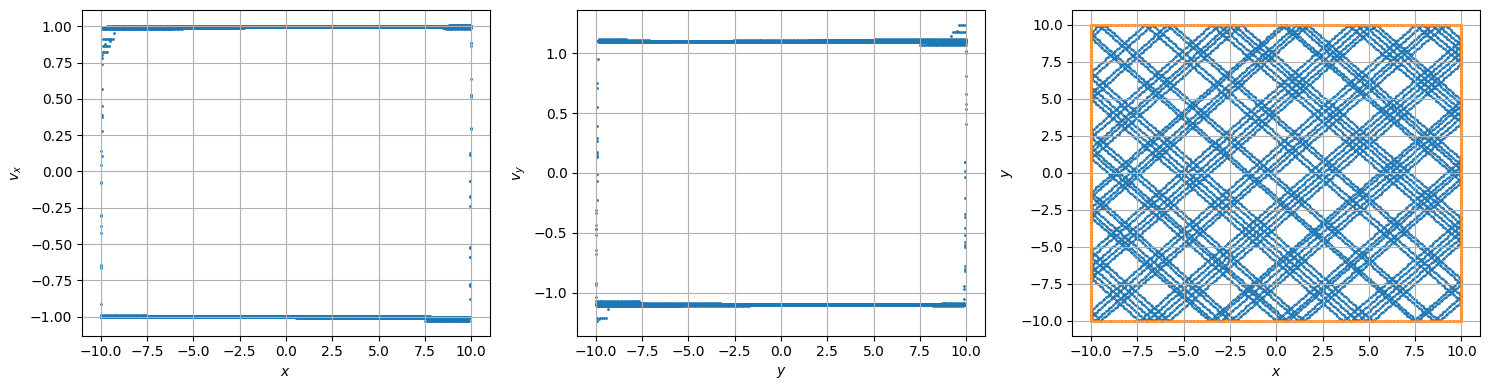

In [3]:
# 设置边界为[-10,10],[-10,10]的正方形，运行粒子在正方形范围内的运动。
# 定义粒子初始状态
import numpy as np
import matplotlib.pyplot as plt
# 坐标 速度
state = np.array([(0.0,0.0),(1.0,1.1)])
pos = state[0]
v = state[1]
x = pos[0]
y = pos[1]
vx = v[0]
vy=v[1]

# 记录轨迹
traces = []
traces.append(pos)
length = 0
lengths = []
lengths.append(length)

# 定义边界
bound_range = np.linspace(-10,10,201)
left_bound = np.stack([np.ones_like(bound_range,dtype="float64")*(-10),bound_range],axis=1)
right_bound = np.stack([np.ones_like(bound_range,dtype="float64")*(10),bound_range],axis=1)
upper_bound = np.stack([bound_range,np.ones_like(bound_range,dtype="float64")*(10)],axis=1)
lower_bound = np.stack([bound_range,np.ones_like(bound_range,dtype="float64")*(-10)],axis=1)
bound = np.concatenate([left_bound,right_bound,upper_bound,lower_bound],axis=0)

# 粒子在运动过程中是匀速运动，所以运动过程实际上是不需要考虑的。只需要绘制碰撞的轨迹。
# 最后将碰撞的轨迹参数化，因为总速度不变，那么运动随时间的变化就自然可以求出，就可以绘制出相应的相图和吸引子图像。

# 计算粒子前进方向可能碰到的点
# 点有这样的性质：与粒子速度方向内积>0,叉乘最小。
for _ in range(100):
    ev = v/np.linalg.norm(v)
    relative_pos = bound - pos
    dot = np.dot(relative_pos,ev)
    cross = np.cross(relative_pos,ev)
    collision_point = bound[dot>=0][np.argmin(np.abs(cross)[dot>0])]
    # 碰撞点到自由粒子的距离
    trace_len = np.linalg.norm(collision_point-pos)
    # 碰撞处切线
    # 离碰撞点最近的点:
    distance = np.linalg.norm(bound-collision_point,axis=1)
    nearest_point = bound[np.argsort(distance)[1:3]]
    # 切线斜率
    # k = 1/2*((nearest_point[0][1]-collision_point[1])/(nearest_point[0][0]-collision_point[0])+(nearest_point[1][1]-collision_point[1])/(nearest_point[1][0]-collision_point[0]))
    # 切线向量
    e_tangent = nearest_point[1]-nearest_point[0]
    e_tangent = e_tangent/np.linalg.norm(e_tangent)
    e_vertical = np.array([-e_tangent[1],e_tangent[0]])
    # 计算粒子在碰撞点处速度分量

    v_parallet = np.dot(v,e_tangent)*e_tangent
    v_vertical = np.dot(v,e_vertical)*e_vertical
    new_v = v_parallet - v_vertical     # 垂直分量要反向
    new_pos = collision_point       # 后面会根据动态撒点法降低误差
    pos = new_pos
    v = new_v
    # 记录该阶段走过的径迹(记录最终点即可)
    traces.append(collision_point)
    length = length + trace_len
    lengths.append(length)
    
traces = np.array(traces)
x = traces[:,0]
y = traces[:,1]
lengths = np.array(lengths)
t = lengths/np.linalg.norm(v)
t_q = np.linspace(0,t[-1],10000)
x_q = np.interp(t_q,t,x)
y_q = np.interp(t_q,t,y)
# 现在，已经对trace进行time参数化。
# 绘制相图与吸引子图
vx_q = np.diff(x_q)/np.diff(t_q)
vx_q = np.concatenate([[vx],vx_q])
vy_q = np.diff(y_q)/np.diff(t_q)
vy_q = np.concatenate([[vy],vy_q])
plt.figure(figsize=(3*5,4))
plt.subplot(131)
plt.scatter(x_q,vx_q,s=1)
plt.xlabel("$x$")
plt.ylabel("$v_x$")
plt.grid()
plt.subplot(132)
plt.scatter(y_q,vy_q,s=1)
plt.xlabel("$y$")
plt.ylabel("$v_y$")
plt.grid()
plt.subplot(133)
plt.scatter(x_q,y_q,s=1)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.scatter(bound[:,0],bound[:,1],s=1)
plt.tight_layout()
plt.show()